# Binary classification - IMDB

In [1]:
import tensorflow as tf 
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
## imdb 데이터셋을 로딩하세요. 
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
# train_data의 0번쨰 데이터를 로딩하세요.
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
#tarin_labels의 0번째 데이터를 출력하세요. 
train_labels[0]

1

In [5]:
# train 데이터에서 문장중 단어의 인덱스의 최대값을 출력해보세요. 
max([max(sequence) for sequence in train_data])

9999

In [6]:
# imdb에서 제공하는 word index 를 로딩하고, 
# 숫자로 되어 있는 문장을 디코딩하여 다시 문자로 환원하여 출력해봅시다. 
# train_data[0] 데이터를 문장으로 변환하세요. 

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Data preparation

In [7]:
#학습 데이터는 열의 갯수가 10000개(단어를 나타내는 인덱스) 이므로, 
#각 리뷰에 대해 한 행으로 표현하고, 각 열에 리뷰에서 사용하는 단어가 나왔는지 아닌지 여부를 
# 0/1로 표현한 행렬을 만들어 보세요. 

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# train_labels 및 test_labels 정보를 float32 타입으로 데이터의 형을 변환하여 
# y_train, y_test 에 담으세요. 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Neural net Modeling

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [10]:
#모델링 해보세요. 

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
#모델 아키텍쳐를 출력해보세요.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile하는 여러가지 방법 
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
# compile하는 여러가지 방법 

from tensorflow.keras import losses
from tensorflow.keras import metrics 

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [16]:
# compile하는 여러가지 방법 
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Validataion

In [17]:
#validation 데이터셋은 앞에서부터 10000건, 그 이후 데이터는 train 데이터로 사용하세요.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# 학습을 진행하세요. 학습 결과를 history란는 변수에 담으세요. 
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 590us/step - loss: 0.5475 - acc: 0.7567 - val_loss: 0.4354 - val_acc: 0.8395
Epoch 2/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.3361 - acc: 0.8959 - val_loss: 0.3242 - val_acc: 0.8845
Epoch 3/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.2370 - acc: 0.9257 - val_loss: 0.2931 - val_acc: 0.8852
Epoch 4/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.1846 - acc: 0.9426 - val_loss: 0.2792 - val_acc: 0.8896
Epoch 5/20
15000/15000 [==============================] - 4s 257us/step - loss: 0.1461 - acc: 0.9563 - val_loss: 0.2779 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.1212 - acc: 0.9634 - val_loss: 0.2926 - val_acc: 0.8845
Epoch 7/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.0967 - acc: 0.9743 - val_loss: 0.3139 - 

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [22]:
model.metrics_names

['loss', 'acc']

# 시각화

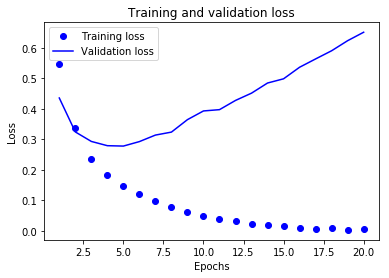

In [25]:
# accuracy의 변화와, loss의 변화를 시각화 하세요. 

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

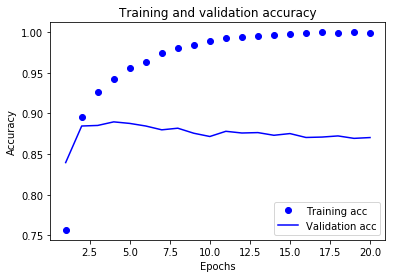

In [24]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# epoch = 4 변경후 Training

In [26]:
# epoch 변경후 다시 학습하세요. 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

#학습후 test 데이터로 evaluation 하세요. 
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 206us/step - loss: 0.4935 - acc: 0.7980
Epoch 2/4
25000/25000 [==============================] - 4s 175us/step - loss: 0.2780 - acc: 0.9087
Epoch 3/4
25000/25000 [==============================] - 4s 171us/step - loss: 0.2064 - acc: 0.9288 4s - loss: 0.2024 - acc: 
Epoch 4/4
25000/25000 [==============================] - 8s 302us/step


In [28]:
results

[0.32560845182418824, 0.86896]

## Prediction

In [29]:
# x_test 데이터로 예측수행하세요. 
model.predict(x_test)

array([[0.23070365],
       [0.9968015 ],
       [0.942468  ],
       ...,
       [0.23828219],
       [0.16428456],
       [0.7672731 ]], dtype=float32)

In [30]:
#모델의 가중치를 출력하세요.
model.get_weights()

[array([[-0.0090407 ,  0.00474969, -0.0239549 , ..., -0.00627599,
         -0.01497211,  0.00205172],
        [ 0.05897982,  0.03251505,  0.03628473, ...,  0.01637935,
          0.00703133,  0.04249271],
        [ 0.06616017,  0.0305146 ,  0.0098179 , ...,  0.02827393,
          0.00269044,  0.02562295],
        ...,
        [-0.01532255,  0.01090367,  0.01264897, ...,  0.01948362,
         -0.00797469,  0.00361606],
        [ 0.01734157,  0.0303224 ,  0.01597589, ..., -0.00107091,
          0.00021816,  0.00731268],
        [ 0.01846932,  0.00293813, -0.02939217, ...,  0.01300525,
          0.0142794 ,  0.01112555]], dtype=float32),
 array([ 0.05603553,  0.02058645,  0.02463587,  0.00295819,  0.01682534,
         0.02776156,  0.03148749,  0.02981534,  0.04737172,  0.008514  ,
        -0.01415379,  0.01088938,  0.03634923,  0.00971058,  0.01481252,
         0.03538096], dtype=float32),
 array([[ 0.25767466, -0.2774778 ,  0.19812454, -0.48618317, -0.12773739,
          0.12250965, -0.31